In [1]:
import csv
import string
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
import pathlib

In [2]:
TRAINING_DIR = 'D:/Python Notebooks/Bangkit Capstone Project/New Train Test Split/Training'
VALIDATION_DIR = 'D:/Python Notebooks/Bangkit Capstone Project/New Train Test Split/Testing'

In [12]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  train_datagen = ImageDataGenerator(rescale=1./255,
                                     rotation_range=10, 
                                     zoom_range=0.1, 
                                     width_shift_range=0.1,  
                                     height_shift_range=0.1)

  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=50,
                                                      class_mode='categorical',
                                                      target_size=(150, 150))

  validation_datagen = ImageDataGenerator(rescale=1/255)

  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=50,
                                                                class_mode='categorical',
                                                                target_size=(150, 150))
  
  return train_generator, validation_generator

In [13]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 672 images belonging to 24 classes.
Found 297 images belonging to 24 classes.


In [14]:
def create_model():

  model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
                                      tf.keras.layers.MaxPooling2D(2, 2),
                                      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                      tf.keras.layers.MaxPooling2D(2,2),
                                      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                      tf.keras.layers.MaxPooling2D(2,2),
                                      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                      tf.keras.layers.MaxPooling2D(2,2),
                                      tf.keras.layers.Flatten(),                                 
                                      tf.keras.layers.Dense(256, activation='relu'),
                                      tf.keras.layers.Dropout(0.2),
                                      tf.keras.layers.Dense(24, activation='softmax')])

  model.compile(optimizer = 'adam',
                loss = 'categorical_crossentropy',
                metrics=['accuracy']) 
  
  return model

In [15]:
model = create_model()

history = model.fit(train_generator,
                    epochs=100,
                    validation_data=validation_generator)

Epoch 1/30
14/14 [==============================] - 137s 10s/step - loss: 3.3146 - accuracy: 0.0342 - val_loss: 3.1776 - val_accuracy: 0.0404
Epoch 2/30
14/14 [==============================] - 130s 9s/step - loss: 3.1797 - accuracy: 0.0476 - val_loss: 3.1762 - val_accuracy: 0.0707
Epoch 3/30
14/14 [==============================] - 128s 9s/step - loss: 3.1746 - accuracy: 0.0670 - val_loss: 3.1746 - val_accuracy: 0.0707
Epoch 4/30
14/14 [==============================] - 128s 9s/step - loss: 3.1711 - accuracy: 0.0729 - val_loss: 3.1685 - val_accuracy: 0.0741
Epoch 5/30
14/14 [==============================] - 136s 10s/step - loss: 3.1520 - accuracy: 0.0714 - val_loss: 3.1474 - val_accuracy: 0.0909
Epoch 6/30
14/14 [==============================] - 134s 10s/step - loss: 3.1084 - accuracy: 0.0952 - val_loss: 3.1154 - val_accuracy: 0.1111
Epoch 7/30
14/14 [==============================] - 132s 10s/step - loss: 3.0387 - accuracy: 0.1235 - val_loss: 3.0323 - val_accuracy: 0.1313
Epoch 8/3

In [7]:
model.save('D:/Python Notebooks/Bangkit Capstone Project/Saved Model/model2.h5')

In [2]:
model = tf.keras.models.load_model("D:/Python Notebooks/Bangkit Capstone Project/Saved Model/model2.h5")

In [3]:
saved_model = 'D:/Python Notebooks/Bangkit Capstone Project/Saved Model/'
tf.saved_model.save(model, saved_model)

INFO:tensorflow:Assets written to: D:/Python Notebooks/Bangkit Capstone Project/Saved Model/assets


INFO:tensorflow:Assets written to: D:/Python Notebooks/Bangkit Capstone Project/Saved Model/assets


In [4]:
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model)
tflite_model = converter.convert()

In [7]:
tflite_model_file = pathlib.Path('D:/Python Notebooks/Bangkit Capstone Project/Saved Model/alphabet_model.tflite')
tflite_model_file.write_bytes(tflite_model)

19272216

In [8]:
paths = []

classes = ['A', 'B', 'C', 'D', 'E', 'F', 
           'G', 'H', 'I', 'K', 'L', 'M', 
           'N', 'O', 'P', 'Q', 'R', 'S',  
           'T', 'U', 'V', 'W', 'X', 'Y']
    
for alphabet in classes:
    paths.append('D:/Python Notebooks/Bangkit Capstone Project/Sign Language Testing/{}.jpg'.format(alphabet))
print(paths)

['D:/Python Notebooks/Bangkit Capstone Project/Sign Language Testing/A.jpg', 'D:/Python Notebooks/Bangkit Capstone Project/Sign Language Testing/B.jpg', 'D:/Python Notebooks/Bangkit Capstone Project/Sign Language Testing/C.jpg', 'D:/Python Notebooks/Bangkit Capstone Project/Sign Language Testing/D.jpg', 'D:/Python Notebooks/Bangkit Capstone Project/Sign Language Testing/E.jpg', 'D:/Python Notebooks/Bangkit Capstone Project/Sign Language Testing/F.jpg', 'D:/Python Notebooks/Bangkit Capstone Project/Sign Language Testing/G.jpg', 'D:/Python Notebooks/Bangkit Capstone Project/Sign Language Testing/H.jpg', 'D:/Python Notebooks/Bangkit Capstone Project/Sign Language Testing/I.jpg', 'D:/Python Notebooks/Bangkit Capstone Project/Sign Language Testing/K.jpg', 'D:/Python Notebooks/Bangkit Capstone Project/Sign Language Testing/L.jpg', 'D:/Python Notebooks/Bangkit Capstone Project/Sign Language Testing/M.jpg', 'D:/Python Notebooks/Bangkit Capstone Project/Sign Language Testing/N.jpg', 'D:/Python 

In [16]:
paths = []
paths.append("D:/Python Notebooks/Bangkit Capstone Project/New Dataset - Copy/A/IMG_20220602_161228.jpg")
print(paths)

['D:/Python Notebooks/Bangkit Capstone Project/New Dataset - Copy/A/IMG_20220602_161228.jpg']


1/1 [==============================] - 1s 521ms/step
161228.jpg is a sign language of 'A'
[9.9704689e-01 3.0166420e-05 1.2504856e-05 2.1604569e-04 4.5932480e-04
 1.1479764e-05 6.1074212e-07 5.5690598e-05 2.7002054e-06 4.7647663e-06
 6.5443169e-06 1.6593943e-09 1.4636593e-05 2.1435887e-06 6.7504260e-08
 3.4452512e-07 2.3864523e-06 6.8849156e-05 2.2020618e-06 5.5943281e-07
 5.0269364e-04 6.7299305e-07 5.9681059e-07 1.5581242e-03]


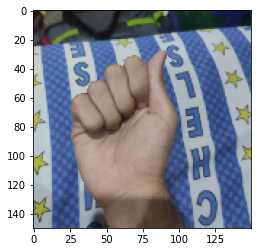

In [17]:
import numpy as np

for path in paths:
    img = tf.keras.preprocessing.image.load_img(path, target_size=(150,150))
    #img = img.rotate(270)
    x = tf.keras.preprocessing.image.img_to_array(img)
    x /= 255
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    image_prob = model.predict(images, batch_size=10)
    index = image_prob[0].argmax(axis=-1)
    classes = ['A', 'B', 'C', 'D', 'E', 'F', 
               'G', 'H', 'I', 'K', 'L', 'M', 
               'N', 'O', 'P', 'Q', 'R', 'S',  
               'T', 'U', 'V', 'W', 'X', 'Y']
    print("{} is a sign language of '{}'".format(path[-10:], classes[index]))
    print(image_prob[0])
    plt.imshow(img)

In [62]:
from PIL import Image
with Image.open('D:/Python Notebooks/Bangkit Capstone Project/Sign Language Testing/A.jpg') as im:
    im.rotate(270).show()